<a href="https://colab.research.google.com/github/arnavrai09/SteelStressStrainCurve/blob/master/Stress_Strain_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stress-Strain Curve of Steel**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


**Mathematical representation of Stress-Strain Curve - Fe415 & Fe500**  (Source: [SEFI](https://www.sefindia.org/forum/viewtopic.php?p=60848))

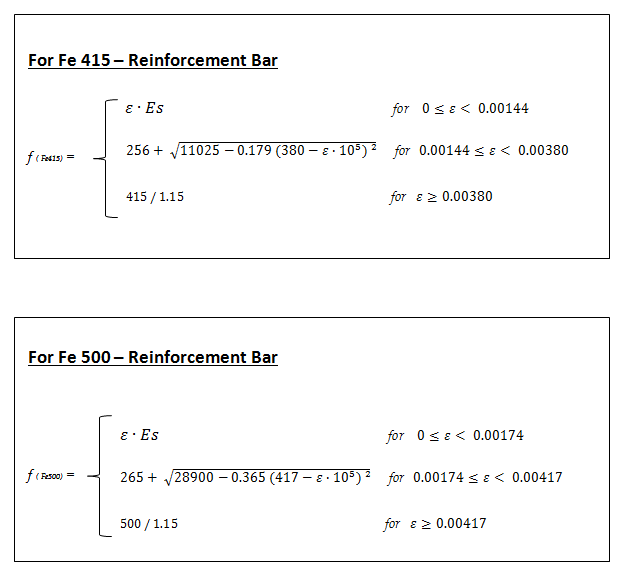

In [2]:
E = 200000

In [3]:
def func(strain, f_y):
  critical_points = np.array([0.00144, 0.00380]) if f_y == 415 else np.array([0.00174, 0.00417])
  if(strain < critical_points[0]):
    return E * strain
  elif(strain < critical_points[-1]):
    result = 256 + (11025 - 0.179 * ((380 - (strain*100000))**2))**(1/2) if f_y == 415 \
    else 265 + (28900 - 0.365 * ((417 - (strain*100000))**2))**(1/2)
    return result
  return f_y/1.15


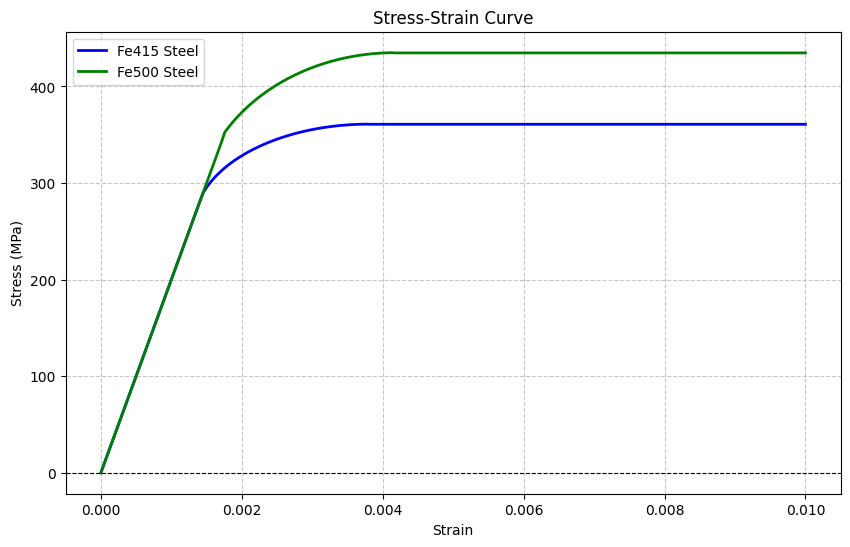

In [4]:
strain = np.linspace(0, 0.01, 200)

stress_fe415 = np.array([func(i, 415) for i in strain])
stress_fe500 = np.array([func(i, 500) for i in strain])

plt.figure(figsize=(10, 6))

plt.plot(strain, stress_fe415, label='Fe415 Steel', linewidth=2, color='b')
plt.plot(strain, stress_fe500, label='Fe500 Steel', linewidth=2, color='g')

plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.title('Stress-Strain Curve')

plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.show()